In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

In [138]:
class VeereshNetwork(nn.Module):

    def __init__(self,input_dim,hidden_layers,output_dim):
        super(VeereshNetwork,self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_dim,hidden_layers[0]))
        for i in range(1,len(hidden_layers)):
            self.hidden_layers.append(nn.Linear(hidden_layers[i-1],hidden_layers[i]))
        self.output_layer= nn.Linear(hidden_layers[-1],output_dim)

    def forward(self,x):
        for layer in self.hidden_layers:
            x=layer(x)
            x=F.relu(x)
        x = self.output_layer(x)
        return x

In [139]:
path="D:\\Projects\\corp_tution_projects\\Iris_project\\Project_4\\data\\train.csv"
data=pd.read_csv(path)

In [140]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [141]:
X = data.drop(columns=['price_range']) # NumPy array
y = data['price_range']      # NumPy array



In [142]:
 X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [143]:
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [144]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # (N,) → (N,1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [111]:
y_train_tensor

tensor([1, 2, 0,  ..., 2, 3, 1])

In [145]:
model = VeereshNetwork(input_dim=X_train.shape[-1], hidden_layers=[3,2], output_dim=4)

In [146]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [147]:
epochs = 10
losses=[]
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        # print()
        preds = model(xb)
        # print(preds.reshape(-1,1))
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        # print(loss)
    losses.append(epoch_loss)
    # break

In [148]:
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    predicted_classes = torch.argmax(logits, dim=1)
    accuracy = (predicted_classes == y_test_tensor).float().mean()

In [149]:
print(accuracy)

tensor(0.8425)


In [150]:
print(losses)

[142.45112526416779, 139.87001931667328, 136.66832852363586, 130.954735994339, 120.7295595407486, 108.22571730613708, 96.7151095867157, 87.28754276037216, 79.44232702255249, 72.60384088754654]


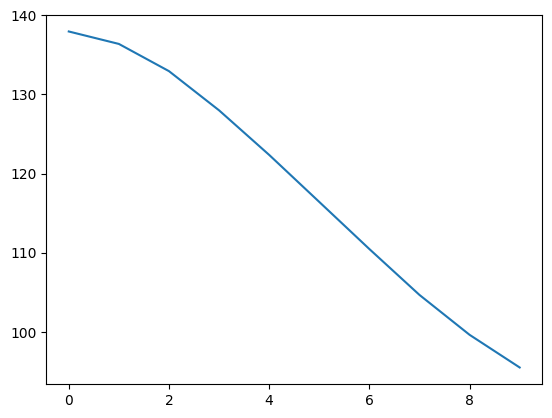

In [134]:
plt.plot(losses)

In [ ]:
def train_model(x,y,model,test_size,batch_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # (N,) → (N,1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
    
    # Create datasets and dataloaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    return train_loader,test_loader
    

In [135]:
def train_model(model,epoch):
    losses=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for xb, yb in train_loader:
            # print()
            preds = model(xb)
            # print(preds.reshape(-1,1))
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            # print(loss)
        losses.append(epoch_loss)
    return model,losses

In [157]:
def plot_loss_accuracy(losses, epochs):
    fig, axes = plt.subplots(1, 1, figsize=(14, 6))

    # Plot Loss
    axes.plot(range(1, epochs + 1), losses, marker='o', linestyle='-', color='tab:red', linewidth=2)
    axes.set_title("📉 Training Loss vs Epochs", fontsize=16)
    axes.set_xlabel("Epoch", fontsize=14)
    axes.set_ylabel("Loss", fontsize=14)
    axes.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    return fig

C:\Users\Veeresh\AppData\Local\Temp\ipykernel_7784\1105814361.py:11: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


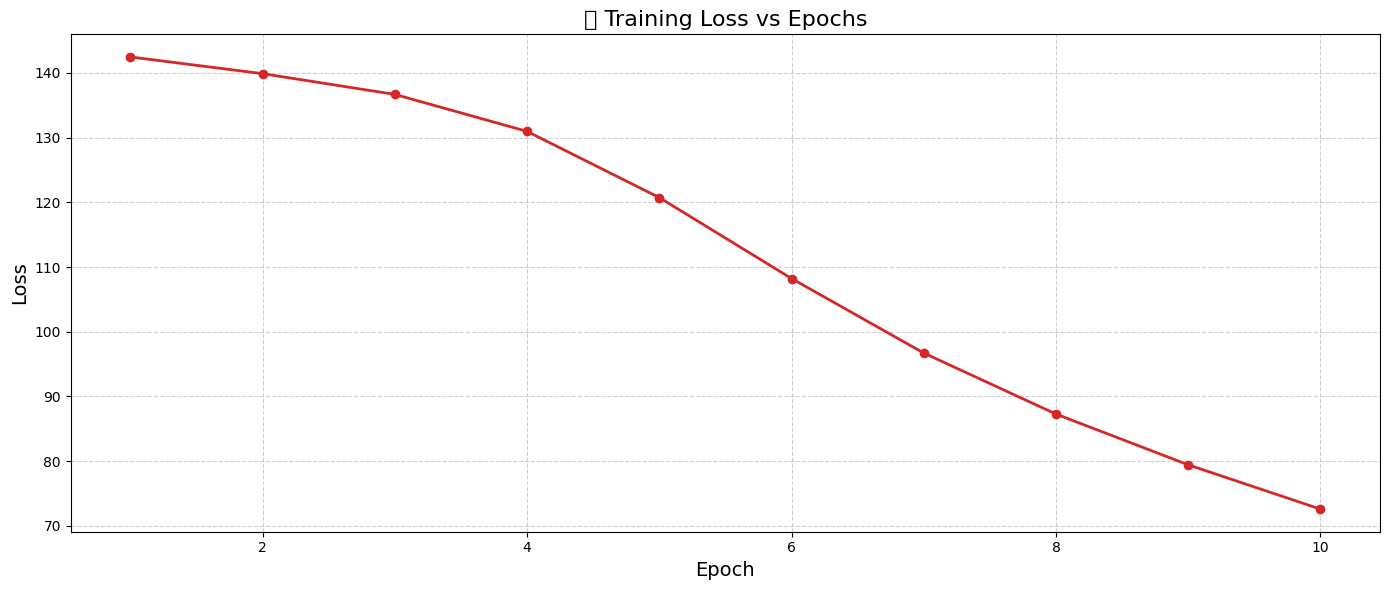

In [158]:
plot_loss_accuracy(losses,10)